In [1]:
import sys

In [3]:
!{sys.executable} -m pip install -r ../requirements.txt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Defaulting to user installation because normal site-packages is not writeable


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

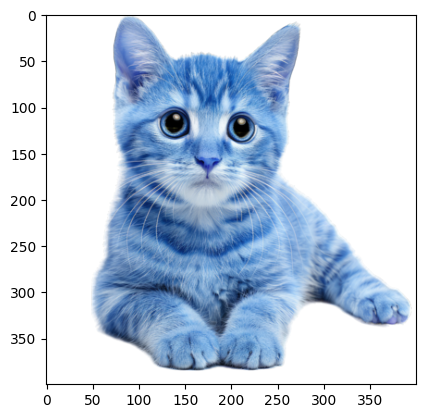

In [13]:
img = cv2.imread("../cat.png", cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray')

In [41]:
def apply_rotation(img, theta = 0, center = (img.shape[0]/2, img.shape[1]/2)):
    center_x = center[1]
    center_y = center[0]
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    new_img = np.zeros(img.shape, img.dtype)
    for x in range(img.shape[1]):
        for y in range(img.shape[0]):
            new_x = int((x-center_x) * cos_theta + (y-center_y) * sin_theta + center_x)
            new_y = int(-(x-center_x) * sin_theta + (y-center_y) * cos_theta + center_y)

            if new_x < 0 or new_x >= img.shape[1] or new_y < 0 or new_y >= img.shape[0]:
                continue

            new_img[new_y][new_x] = img[y][x]
    return new_img

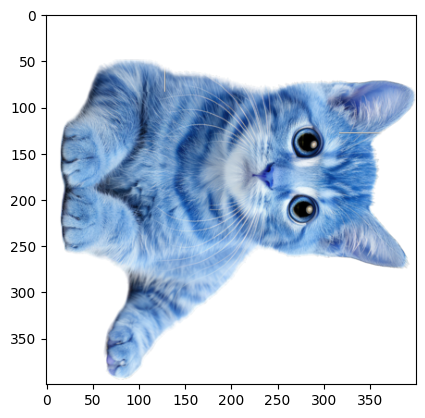

In [42]:
rotated_img = apply_rotation(img, -np.pi/2)
plt.imshow(rotated_img, cmap='gray')

In [45]:
def apply_shear(img, shear_x = 1, shear_y = 1, center = (img.shape[0]/2, img.shape[1]/2)):
    center_y = center[0]
    center_x = center[1]
    new_img = np.zeros(img.shape, dtype=img.dtype)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            new_x = int(shear_x * (x - center_x) + center_x)
            new_y = int(shear_y * (y - center_y) + center_y)

            if new_x >= img.shape[1] or new_x <= 0 or new_y >= img.shape[0] or new_y <= 0:
                continue

            new_img[new_y][new_x] = img[y][x]

    return new_img

def apply_zoom(img, scale = 1, center = (img.shape[0]/2, img.shape[1]/2)):
    return apply_shear(img, scale, scale, center)

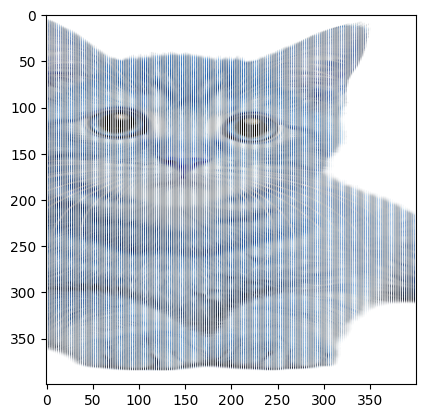

In [46]:
img_x_sheared = apply_shear(img, shear_x=2)
plt.imshow(img_x_sheared, cmap='gray')

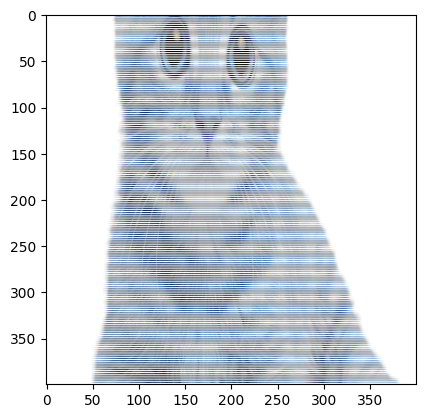

In [47]:
img_y_sheared = apply_shear(img, shear_y=2)
plt.imshow(img_y_sheared, cmap='gray')

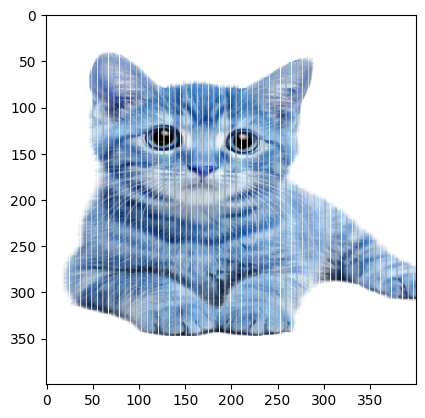

In [62]:
img_sheared = apply_shear(img, shear_x=1.2, shear_y=0.8)
plt.imshow(img_sheared, cmap='gray')

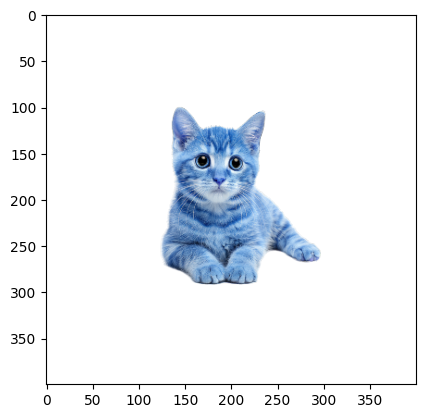

In [58]:
img_zoomed = apply_zoom(img, 0.5)
plt.imshow(img_zoomed, cmap='gray')

In [67]:
# modularized approach
def apply_transform(img, mat = [[1, 0], [0, 1]], center = (img.shape[0]/2, img.shape[1]/2)):
    center_y = center[0]
    center_x = center[1]
    new_img = np.zeros(img.shape, dtype=img.dtype)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            new_x = int(mat[0][0] * (x - center_x) + mat[1][0] * (y - center_y) + center_x)
            new_y = int(mat[0][1] * (x - center_x) + mat[1][1] * (y - center_y) + center_y)

            if new_x >= img.shape[1] or new_x <= 0 or new_y >= img.shape[0] or new_y <= 0:
                continue

            new_img[new_y][new_x] = img[y][x]

    return new_img

def rotate(img, angle = 0, center = (img.shape[0]/2, img.shape[1]/2)):
    rotation_mat = [[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]]
    return apply_transform(img, rotation_mat, center)

def shear(img, shear_x_vec = [1, 0], shear_y_vec = [0, 1], center = (img.shape[0]/2, img.shape[1]/2)):
    shear_x_magnitude = (shear_x_vec[0] ** 2 + shear_y_vec[0] ** 2) ** 0.5
    shear_y_magnitude = (shear_x_vec[1] ** 2 + shear_y_vec[1] ** 2) ** 0.5
    shear_mat = [[shear_x_vec[0]/shear_x_magnitude, shear_y_vec[0]/shear_y_magnitude],
                 [shear_x_vec[1]/shear_x_magnitude, shear_y_vec[1]/shear_y_magnitude]]
    return apply_transform(img, shear_mat, center)

def scale(img, scale = 1, center = (img.shape[0]/2, img.shape[1]/2)):
    scale_mat = [[scale, 0], [0, scale]]
    return apply_transform(img, scale_mat, center)

In [77]:
rotated_img = rotate(img, np.pi/3)
sheared_img = shear(img, [1, 3], [5, -1])
scaled_img = scale(img, 0.5)

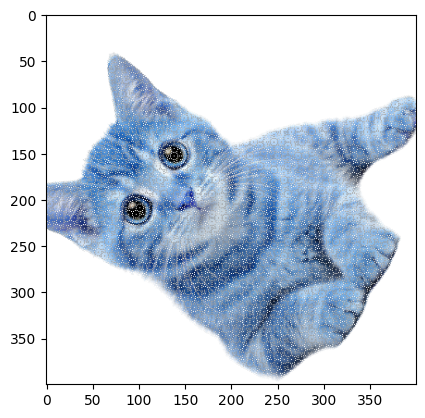

In [78]:
plt.imshow(rotated_img, cmap='gray')

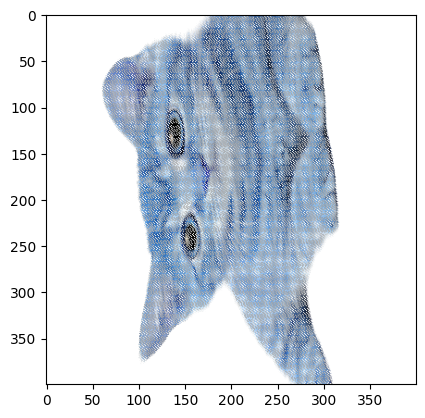

In [79]:
plt.imshow(sheared_img, cmap='gray')

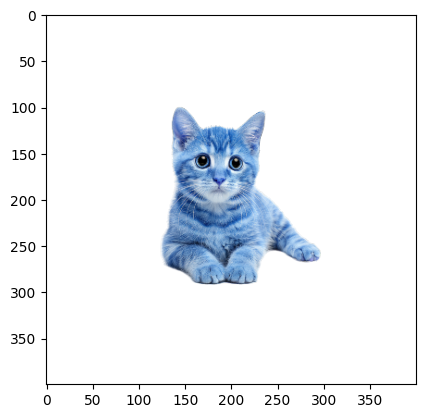

In [80]:
plt.imshow(scaled_img, cmap='gray')